In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sklearn.cluster as sk
import matplotlib.pyplot as plt
import alpaca_trade_api as alp
import lib.tools.Broker as br
import plotly
import lib.tools.Toolbox as tb
import lib.tools.TimeKeeper as tk
import lib.tools.Scrivener as sc
import pandas as pd

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
symbol = 'NVDA'
#, 'AMZN':tb.get_archive('AMZN')}
#dates = tb.get_unique_dates(data)
#dindex = 9; date = dates[dindex]
#data = data[dates[dindex-1]:dates[dindex+1]]

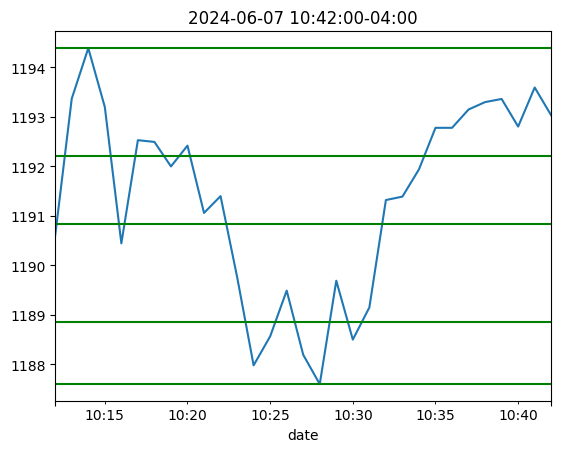

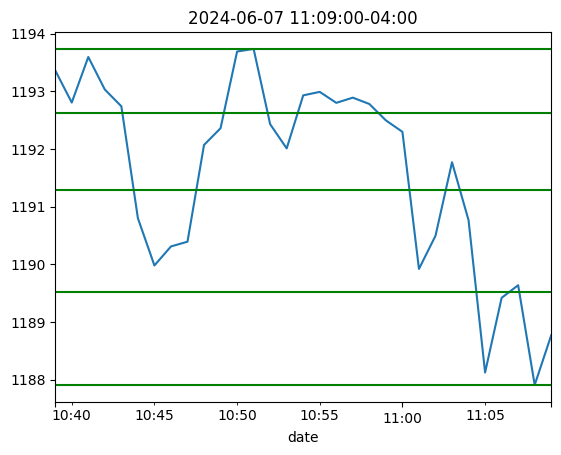

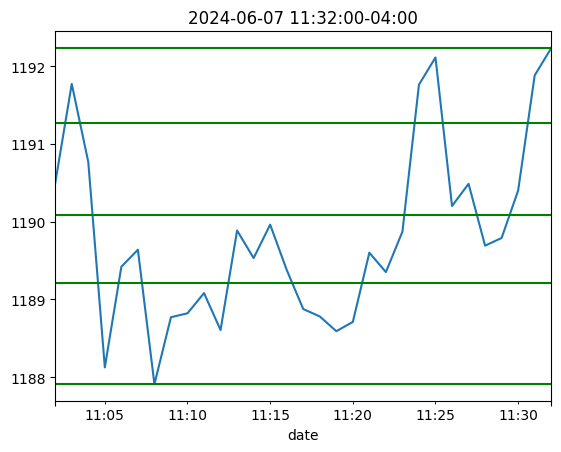

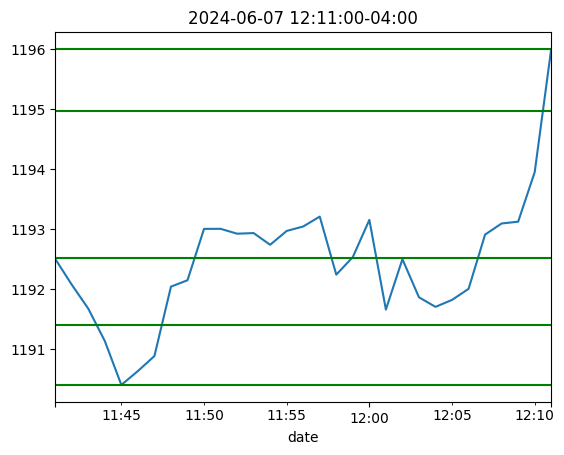

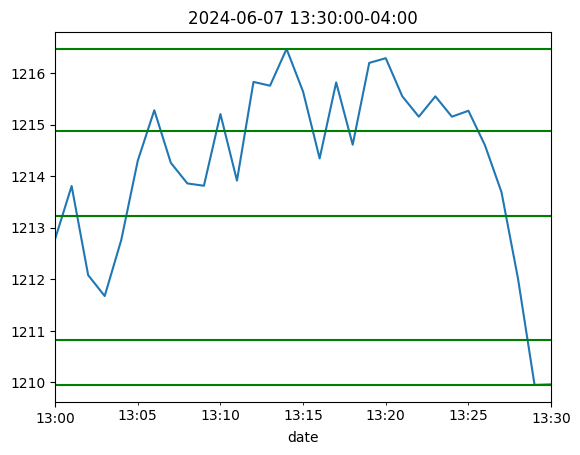

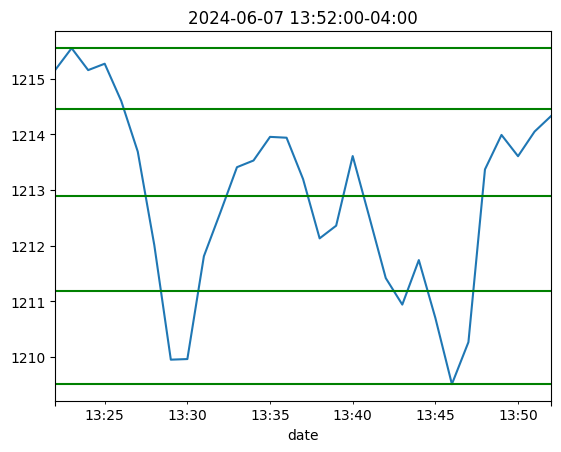

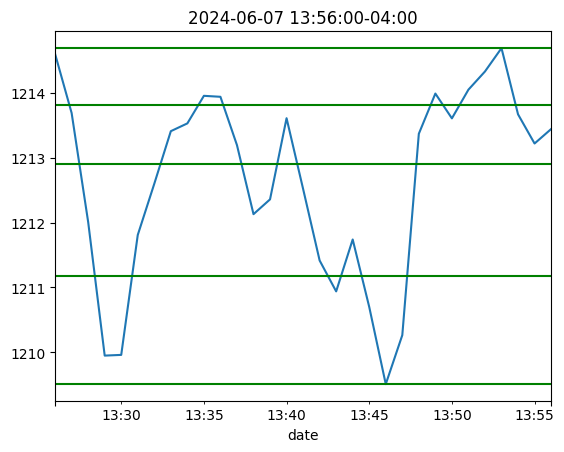

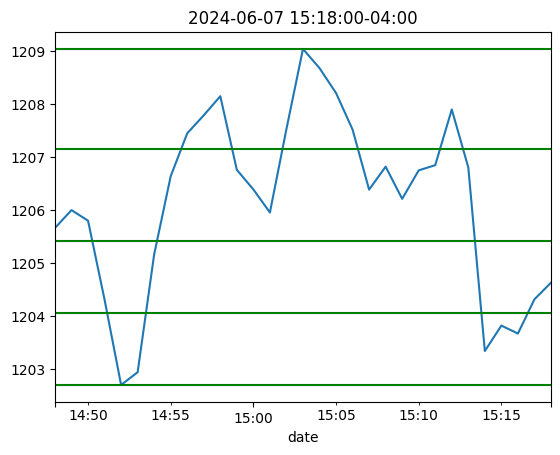

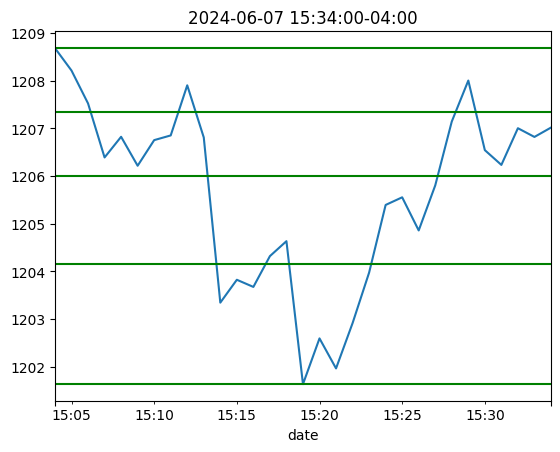

In [36]:
def create_clusters(series:pd.Series):
    arr = np.array(series)

    K = 4
    reshaped = arr.reshape(-1,1)
    kmeans = sk.KMeans(n_clusters=K).fit(reshaped)
    clusters = kmeans.predict(reshaped)
    df = pd.DataFrame({'date': series.index, 'price': series, 'cluster':clusters}).set_index('date')
    min_and_max = []
    for i in range(K):
        cluster = df[df.cluster==i]
        min_and_max.append({'mi':cluster.price.min(), 'ma':cluster.price.max()})
    min_and_max = pd.DataFrame(min_and_max).sort_values('mi')
    # Combine mins and maxes
    averaged = [min_and_max.iloc[0].mi]
    for i in range(len(min_and_max)-1):
        averaged.append((min_and_max.iloc[i].ma+min_and_max.iloc[i+1].mi)/2)
    averaged.append(min_and_max.iloc[-1].ma)

    df.price.plot.line()
    for m in averaged:
        plt.axhline(m, color='green')

data = sc.get_processed_archive('NVDA',tk.d(6,7))
time = 30

d = tk.d(6,7,10,42); create_clusters(data.close[d-pd.DateOffset(minutes=time):d]); plt.title(d); plt.show()
d = tk.d(6,7,11,9); create_clusters(data.close[d-pd.DateOffset(minutes=time):d]); plt.title(d); plt.show()
d = tk.d(6,7,11,32); create_clusters(data.close[d-pd.DateOffset(minutes=time):d]); plt.title(d); plt.show()
d = tk.d(6,7,12,11); create_clusters(data.close[d-pd.DateOffset(minutes=time):d]); plt.title(d); plt.show()
d = tk.d(6,7,13,30); create_clusters(data.close[d-pd.DateOffset(minutes=time):d]); plt.title(d); plt.show()
d = tk.d(6,7,13,52); create_clusters(data.close[d-pd.DateOffset(minutes=time):d]); plt.title(d); plt.show()
d = tk.d(6,7,13,56); create_clusters(data.close[d-pd.DateOffset(minutes=time):d]); plt.title(d); plt.show()
d = tk.d(6,7,15,18); create_clusters(data.close[d-pd.DateOffset(minutes=time):d]); plt.title(d); plt.show()
d = tk.d(6,7,15,34); create_clusters(data.close[d-pd.DateOffset(minutes=time):d]); plt.title(d); plt.show()

# incr = 10
# for i in range(incr, len(data), incr):
#     print(i)
#     #series = data.open.iloc[i-60:i]
#     series = data.open.iloc[i-incr:i]
#     create_clusters(series)
    
# def convert_to_i(hour, minute):
#     return tb.get_i(tk.to_time(date.month, date.day, hour, minute), data)

In [9]:
orders = [
[10,43], # IN MIDDLE # BAD
[11,8], # IN TOP
[12,21], # IN BOTTOM # BAD
[14,9], # IN BOTTOM # BAD
[14,56] # IN BOTTOM
]
for i in orders:
    print(i)
    j = convert_to_i(i[0], i[1])
    create_clusters(data.open.iloc[j-60: j])


[10, 43]


AttributeError: module 'lib.tools.TimeKeeper' has no attribute 'to_time'

In [ ]:
df.price.plot.line()
for i in min_and_max.index:
    plt.axhline(min_and_max.loc[i].mi, color='green')
    plt.axhline(min_and_max.loc[i].ma, color='red')

values = []

krange = range(1,10)

for k in krange:
    kmeans_n = sk.KMeans(n_clusters=k)
    kmeans_n.fit(reshaped)
    values.append(kmeans_n.inertia_)

data = tb.get_archive('amzn')[tk.to_time(2,2):]
data['tr0'] = abs(data["high"] - data["low"])
data['tr1'] = abs(data["high"] - data["close"].shift())
data['tr2'] = abs(data["low"] - data["close"].shift())
data['tr'] = data[['tr0', 'tr1', 'tr2']].max(axis=1)

data['tr']
# moving average of the TR
range_ma = data['tr'].rolling(window=length_KC).mean()
# upper Keltner Channel
df['upper_KC'] = m_avg + range_ma * mult_KC
# lower Keltner Channel
df['lower_KC'] = m_avg - range_ma * mult_KC

# Algorithmic Implementation

<Axes: >

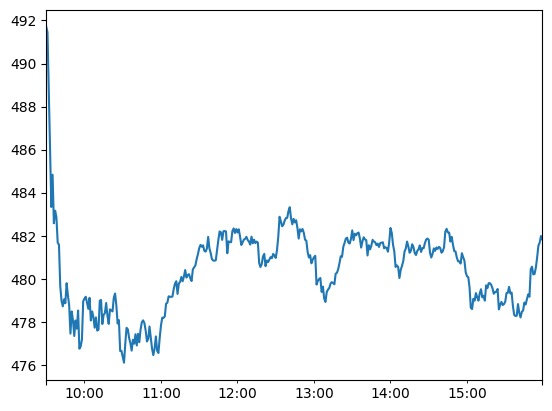

In [5]:
data.close.plot.line()

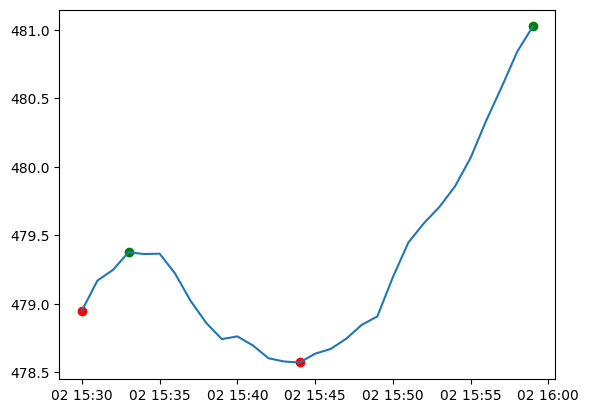

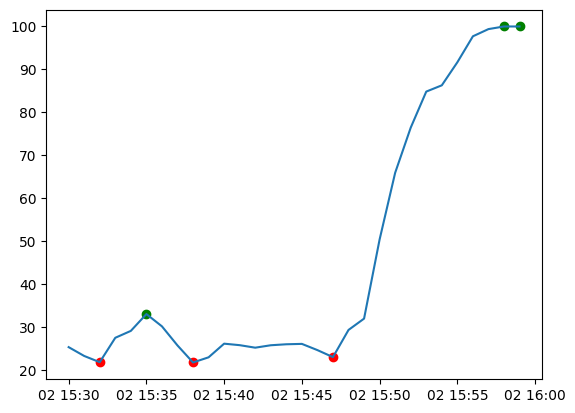

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema

# Generate a noisy AR(1) sample

# np.random.seed(0)
# rs = np.random.randn(200)
# xs = [0]
# for r in rs:
#     xs.append(xs[-1] * 0.9 + r)
# df = pd.DataFrame(xs, columns=['data'])

n = 5  # number of points to be checked before and after

# Find local peaks


df = data.iloc[-30:].ewm(span=10).mean()

rsi = tb.get_rsi(data.ewm(span=10).mean(), column='close').iloc[-30:]


In [6]:
# What do we actually want?
'''  
We want a function where we can give the function an index and it will tell us if that index is a hidden divergence or a regular divergence point.
'''

symbol = 'NVDA'
data = tb.get_archive('NVDA')#, 'AMZN':tb.get_archive('AMZN')}
dates = tb.get_unique_dates(data)
dindex = 9; date = dates[dindex]
data = data[dates[dindex-1]:dates[dindex+1]]


def plot_minima_and_maxima(series:pd.Series):
    mi = series.iloc[argrelextrema(series.values, np.less_equal,
                        order=n)[0]]
    ma = series.iloc[argrelextrema(series.values, np.greater_equal,
                        order=n)[0]]

    # Plot results
    plt.scatter(mi.index, mi.values, c='r')
    plt.scatter(ma.index, ma.values, c='g')
    plt.plot(series.index, series)
    plt.show()

def divergence(index:pd.DatetimeIndex, data:pd.DataFrame, rsi:pd.Series):
    '''Returns whether it's a divergence point'''
    trend = tb.get_trend(index, data.close, ema)
    plt.title('DATA')
    plot_minima_and_maxima(df.close[rsi.index[0]:index])
    plt.title('RSI')
    plot_minima_and_maxima(rsi[:index])
    return trend

df = data[date:];
rsi = tb.get_rsi(df, column='close').ewm(span=10).mean()
peaks = df.ewm(span=10).mean()
ema = data.close.ewm(span=60).mean()

plt.plot(df.index, df.close, lw=.5)
plt.plot(ema[date:].index, ema[date:])
plt.show()
for i in range(0,len(df),5)[10:]:
    index = df.index[i-1]
    trend = divergence(index, peaks, rsi)
    if trend == 1:
        plt.plot(df.index[i], df.close.loc[df.index[i]], '-o', c='g')
    elif trend == -1:
        plt.plot(df.index[i], df.close.loc[df.index[i]], '-o', c='r')
plt.show()


NameError: name 'date' is not defined

# Hone Squeeze Momentum
What are we attempting to do? We are attempting to use local maxima and minima to draw support and resistance lines to verify whether or not squeeze momentum has broken through. We will perform the following operations:
1. ~~Draw in minute data of a day.~~
2. ~~Create a method to identify local maxima and minima.~~
3. ~~Create a method to draw a line between two maxima and two minima and then extrapolate that line out such that we can name a price for any minute in the day.~~
4. ~~Visualize this line.~~
5. ~~Use the lines created by the above method to verify whether the squeeze momentum has broken through, i.e, if price has moved beyond a number of the lines recently then we can confirm it may have broken through.~~
6. ~~Apply this method to the SqueezeMomentum indicator.~~
7. ~~Run the indicator in the tuner.~~
8. ~~Do in-depth analysis of the results on a series of no less than 10 days.~~

In [13]:
%load_ext autoreload
%autoreload 2

from lib.indicators.SqueezeMomentum import SqueezeMomentum
from scipy.signal import argrelextrema  
from lib.indicators.SupportResistance import SupportResistance
import metadata.trade_configs.Globals as gb
import numpy as np
import sklearn.cluster as sk
import matplotlib.pyplot as plt
import plotly
import lib.tools.Toolbox as tb
import lib.tools.TimeKeeper as tk
import lib.tools.Scrivener as sc
import pandas as pd
%matplotlib widget

data = sc.get_archive('nvda', tk.d(6,7))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


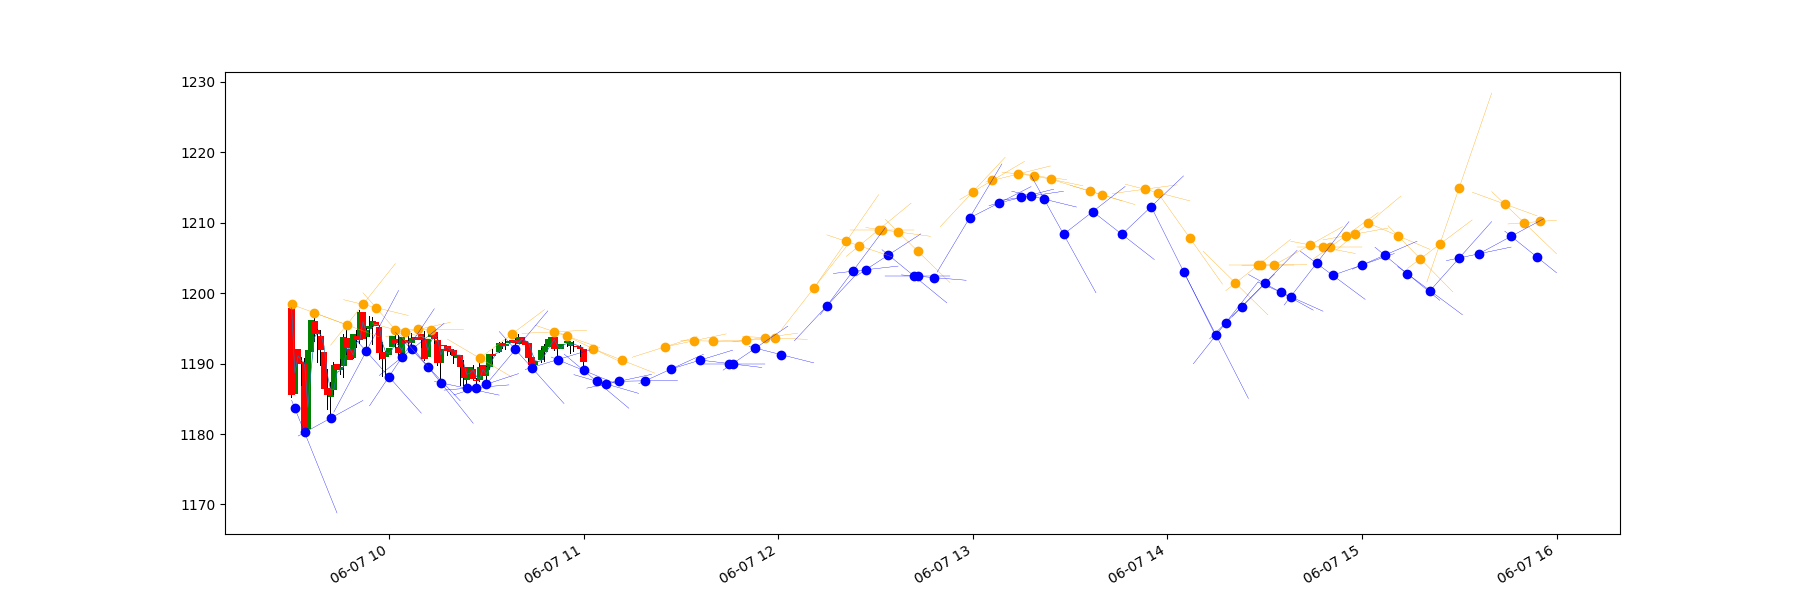

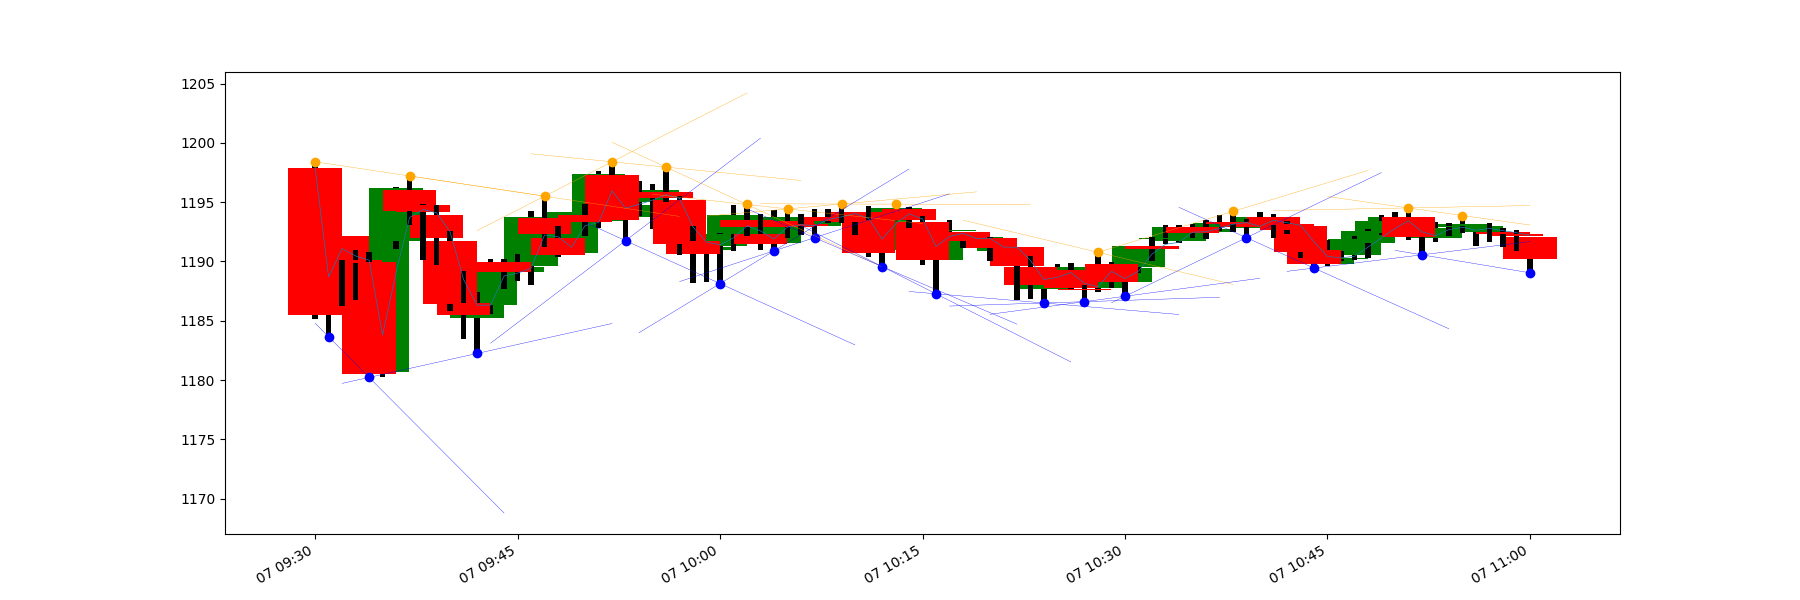

In [19]:
dt = tk.d(6,7,11)
sr = SupportResistance(data)
plt.figure(figsize=(18,6),dpi=100)
tb.candle_plot(data[:dt], 4, 4)
sr.plot(); plt.show()
sr = SupportResistance(data[:dt])
plt.figure(figsize=(18,6),dpi=100)
tb.candle_plot(data[:dt], 2, 2)
sr.plot(); plt.show()

In [ ]:
plt.figure(figsize=(18, 6), dpi=100)
plt.scatter(maxima.index, maxima.values, c='orange')
plt.scatter(minima.index, minima.values, c='blue')
for i in range(len(maxima))[:-1]:
    line = draw_line(maxima.index[i], maxima.index[i+1], maxima, data)
    line = line[maxima.index[i]-pd.DateOffset(minutes=20): maxima.index[i+1]+pd.DateOffset(minutes=20)]
    plt.plot(line.index, line, c='red', lw=.5)
for i in range(len(minima))[:-1]:
    line = draw_line(minima.index[i], minima.index[i+1], minima, data)
    line = line[minima.index[i]-pd.DateOffset(minutes=20): minima.index[i+1]+pd.DateOffset(minutes=20)]
    plt.plot(line.index, line, c='blue', lw=.5)
tb.candle_plot(data)
plt.show()